In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
833,2672-TGEFF,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.80,3340.55,No
2536,0203-HHYIJ,Male,0,No,No,25,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.30,676.35,Yes
2359,2616-UUTFK,Male,0,Yes,No,33,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),72.75,2447.45,No
3021,6377-KSLXC,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,107.05,No
3218,6869-FGJJC,Male,0,No,No,68,Yes,No,Fiber optic,No,...,Yes,No,No,No,One year,No,Credit card (automatic),79.60,5461.45,No


In [3]:
df.drop("customerID",axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [6]:
df.shape

(7043, 20)

In [7]:
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/tn/c2cbg8n95ws2j0pgvtymb0cc0000gn/T/ipykernel_12230/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


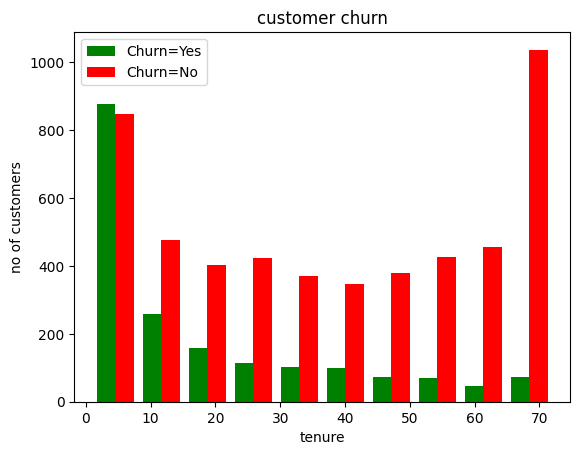

In [9]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure
plt.xlabel("tenure")
plt.ylabel("no of customers")
plt.title("customer churn")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [10]:
def print_unique_col(df):
    for col in df:
        if df[col].dtypes=='object':
            print(col,":",df[col].unique())

In [11]:
print_unique_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [12]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/var/folders/tn/c2cbg8n95ws2j0pgvtymb0cc0000gn/T/ipykernel_12230/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/tn/c2cbg8n95ws2j0pgvtymb0cc0000gn/T/ipykernel_12230/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [13]:
print_unique_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
#changing 0 and 1 for yes and no
yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_col:
    df1[col].replace({"Yes":1,"No":0},inplace=True)

/var/folders/tn/c2cbg8n95ws2j0pgvtymb0cc0000gn/T/ipykernel_12230/1069443132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0},inplace=True)


In [15]:
print_unique_col(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [16]:
df1['gender'].replace({"Male":0,"Female":1},inplace=True)
df1['gender'].unique()

/var/folders/tn/c2cbg8n95ws2j0pgvtymb0cc0000gn/T/ipykernel_12230/1115437249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({"Male":0,"Female":1},inplace=True)


array([1, 0])

In [17]:
#one hot encoding for col InternetService,Contract
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [18]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [19]:
#Scaling the data into same range of data
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1795,1,0,1,0,0.253521,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
3499,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3604,0,0,1,1,0.521127,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [20]:
#train test split

X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [22]:
print("80%:",X_train.shape,"20%:",X_test.shape)

80%: (5625, 26) 20%: (1407, 26)


In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
len(X_test.columns)

26

In [30]:
#creating model

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
  1/176 [..............................] - ETA: 59s - loss: 0.7382 - accuracy: 0.3750

2023-06-12 00:05:08.047942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 2s 8ms/step - loss: 0.5046 - accuracy: 0.7390
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4249 - accuracy: 0.7996
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4175 - accuracy: 0.8011
Epoch 4/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4130 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4105 - accuracy: 0.8050
Epoch 6/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4081 - accuracy: 0.8087
Epoch 7/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4069 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4072 - accuracy: 0.8084
Epoch 9/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4055 - accuracy: 0.8091
Epoch 10/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4026 - accuracy: 0.8116
E

In [31]:
model.evaluate(X_test,y_test)

20/44 [============>.................] - ETA: 0s - loss: 0.4752 - accuracy: 0.7906

2023-06-12 00:10:18.083363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 6ms/step - loss: 0.5060 - accuracy: 0.7726


[0.5059565305709839, 0.7725657224655151]

In [32]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


2023-06-12 00:22:40.840697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.42805004],
       [0.66470504],
       [0.01496965],
       [0.8962184 ],
       [0.48216122]], dtype=float32)

In [33]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [35]:
y_pred = []

for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [36]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.56      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



Text(50.722222222222214, 0.5, 'Truth')

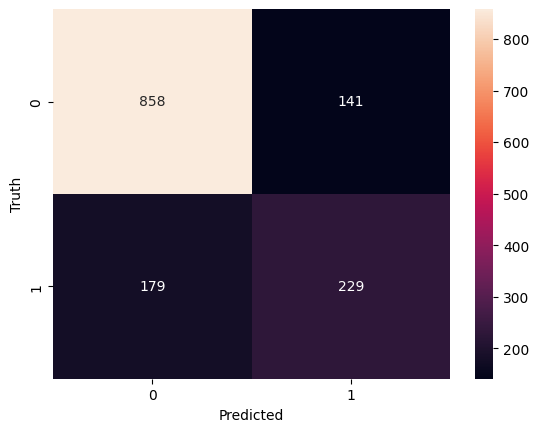

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.Figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [39]:
(858+229)/(858+229+179+141)

0.7725657427149965